In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
# melakukan ekstraksi pada file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/rockpaperscissors')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
import os 
os.listdir(base_dir)

['train', '__MACOSX', 'rockpaperscissors', 'val']

In [ ]:
os.listdir('/tmp/rockpaperscissors/train')

['paper', 'scissors', 'rock']

In [ ]:
os.listdir('/tmp/rockpaperscissors/val')

['paper', 'scissors', 'rock']

In [ ]:
len(os.listdir('/tmp/rockpaperscissors'))

4

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio ("/tmp/rockpaperscissors/rockpaperscissors/rps-cv-images", output= "/tmp/rockpaperscissors/", seed = 2188, ratio = (.6, .4) )

Copying files: 2188 files [00:00, 3886.79 files/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split=0.6,
                    fill_mode = 'nearest')
 
validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split=0.4,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')
    

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Dropout, Lambda
from keras.layers.embeddings import Embedding
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=20,  
      epochs=20, 
      validation_data=validation_generator, 
      validation_steps=25,  
      verbose=2)

Epoch 1/20
20/20 - 41s - loss: 0.1743 - accuracy: 0.9406 - val_loss: 0.1511 - val_accuracy: 0.9513
Epoch 2/20
20/20 - 41s - loss: 0.1638 - accuracy: 0.9547 - val_loss: 0.2027 - val_accuracy: 0.9388
Epoch 3/20
20/20 - 41s - loss: 0.1652 - accuracy: 0.9484 - val_loss: 0.1965 - val_accuracy: 0.9287
Epoch 4/20
20/20 - 41s - loss: 0.1315 - accuracy: 0.9641 - val_loss: 0.1451 - val_accuracy: 0.9575
Epoch 5/20
20/20 - 41s - loss: 0.0799 - accuracy: 0.9750 - val_loss: 0.1744 - val_accuracy: 0.9525
Epoch 6/20
20/20 - 41s - loss: 0.1549 - accuracy: 0.9547 - val_loss: 0.1906 - val_accuracy: 0.9513
Epoch 7/20
20/20 - 41s - loss: 0.1239 - accuracy: 0.9563 - val_loss: 0.1770 - val_accuracy: 0.9413
Epoch 8/20
20/20 - 41s - loss: 0.1461 - accuracy: 0.9422 - val_loss: 0.1388 - val_accuracy: 0.9438
Epoch 9/20
20/20 - 41s - loss: 0.1276 - accuracy: 0.9609 - val_loss: 0.1637 - val_accuracy: 0.9563
Epoch 10/20
20/20 - 41s - loss: 0.1076 - accuracy: 0.9672 - val_loss: 0.1077 - val_accuracy: 0.9625
Epoch 11/

Saving kertas.jpg to kertas.jpg
kertas.jpg
paper


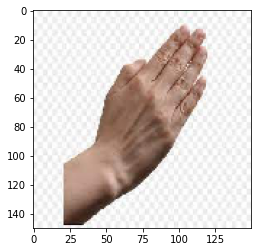

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')